In [3]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import os
import json
from datetime import datetime

In [6]:
def get_all_cbct_metadata(nifti_path):
    """
    Extract and display all metadata from CBCT NIfTI file
    
    Args:
        nifti_path: Path to .nii or .nii.gz file
    
    Returns:
        metadata_dict: Dictionary containing all metadata
    """
    print("="*70)
    print(f"CBCT METADATA ANALYSIS")
    print("="*70)
    print(f"File: {nifti_path}\n")
    
    # Load NIfTI image
    nifti_img = nib.load(nifti_path)
    header = nifti_img.header
    volume = nifti_img.get_fdata()
    affine = nifti_img.affine
    
    metadata = {}
    
    # ====================
    # BASIC IMAGE INFO
    # ====================
    print("\n" + "="*70)
    print("BASIC IMAGE INFORMATION")
    print("="*70)
    
    metadata['basic_info'] = {
        'file_path': nifti_path,
        'file_format': nifti_img.__class__.__name__,
        'data_shape': volume.shape,
        'dimensions': len(volume.shape),
        'data_type': str(volume.dtype),
        'endianness': header.endianness
    }
    
    print(f"File Format: {metadata['basic_info']['file_format']}")
    print(f"Data Shape (X, Y, Z): {metadata['basic_info']['data_shape']}")
    print(f"Number of Dimensions: {metadata['basic_info']['dimensions']}")
    print(f"Data Type: {metadata['basic_info']['data_type']}")
    print(f"Endianness: {metadata['basic_info']['endianness']}")
    
    # ====================
    # VOXEL INFORMATION
    # ====================
    print("\n" + "="*70)
    print("VOXEL INFORMATION")
    print("="*70)
    
    voxel_dims = header.get_zooms()
    metadata['voxel_info'] = {
        'voxel_dimensions': voxel_dims,
        'voxel_size_x_mm': float(voxel_dims[0]),
        'voxel_size_y_mm': float(voxel_dims[1]),
        'voxel_size_z_mm': float(voxel_dims[2]),
        'total_voxels': int(np.prod(volume.shape)),
        'voxel_volume_mm3': float(np.prod(voxel_dims[:3]))
    }
    
    print(f"Voxel Dimensions (X, Y, Z): {voxel_dims}")
    print(f"Voxel Size X: {metadata['voxel_info']['voxel_size_x_mm']:.4f} mm")
    print(f"Voxel Size Y: {metadata['voxel_info']['voxel_size_y_mm']:.4f} mm")
    print(f"Voxel Size Z: {metadata['voxel_info']['voxel_size_z_mm']:.4f} mm")
    print(f"Total Number of Voxels: {metadata['voxel_info']['total_voxels']:,}")
    print(f"Volume of Each Voxel: {metadata['voxel_info']['voxel_volume_mm3']:.4f} mm³")
    
    # ====================
    # PHYSICAL DIMENSIONS
    # ====================
    print("\n" + "="*70)
    print("PHYSICAL DIMENSIONS")
    print("="*70)
    
    metadata['physical_dims'] = {
        'width_mm': float(volume.shape[0] * voxel_dims[0]),
        'height_mm': float(volume.shape[1] * voxel_dims[1]),
        'depth_mm': float(volume.shape[2] * voxel_dims[2]),
        'total_volume_mm3': float(np.prod(volume.shape) * np.prod(voxel_dims[:3]))
    }
    
    print(f"Physical Width (X): {metadata['physical_dims']['width_mm']:.2f} mm")
    print(f"Physical Height (Y): {metadata['physical_dims']['height_mm']:.2f} mm")
    print(f"Physical Depth (Z): {metadata['physical_dims']['depth_mm']:.2f} mm")
    print(f"Total Physical Volume: {metadata['physical_dims']['total_volume_mm3']:.2f} mm³")
    
    # ====================
    # INTENSITY VALUES
    # ====================
    print("\n" + "="*70)
    print("INTENSITY VALUES STATISTICS")
    print("="*70)
    
    metadata['intensity_stats'] = {
        'min_value': float(volume.min()),
        'max_value': float(volume.max()),
        'mean_value': float(volume.mean()),
        'median_value': float(np.median(volume)),
        'std_deviation': float(volume.std()),
        'percentile_1': float(np.percentile(volume, 1)),
        'percentile_25': float(np.percentile(volume, 25)),
        'percentile_50': float(np.percentile(volume, 50)),
        'percentile_75': float(np.percentile(volume, 75)),
        'percentile_99': float(np.percentile(volume, 99))
    }
    
    print(f"Min Intensity: {metadata['intensity_stats']['min_value']:.2f}")
    print(f"Max Intensity: {metadata['intensity_stats']['max_value']:.2f}")
    print(f"Mean Intensity: {metadata['intensity_stats']['mean_value']:.2f}")
    print(f"Median Intensity: {metadata['intensity_stats']['median_value']:.2f}")
    print(f"Standard Deviation: {metadata['intensity_stats']['std_deviation']:.2f}")
    print(f"1st Percentile: {metadata['intensity_stats']['percentile_1']:.2f}")
    print(f"25th Percentile: {metadata['intensity_stats']['percentile_25']:.2f}")
    print(f"50th Percentile: {metadata['intensity_stats']['percentile_50']:.2f}")
    print(f"75th Percentile: {metadata['intensity_stats']['percentile_75']:.2f}")
    print(f"99th Percentile: {metadata['intensity_stats']['percentile_99']:.2f}")
    
    # ====================
    # AFFINE MATRIX
    # ====================
    print("\n" + "="*70)
    print("AFFINE TRANSFORMATION MATRIX")
    print("="*70)
    
    metadata['affine_matrix'] = affine.tolist()
    
    print("Affine Matrix (4x4):")
    print(affine)
    print("\nThis matrix defines the mapping from voxel coordinates to world coordinates")
    
    # ====================
    # ORIENTATION
    # ====================
    print("\n" + "="*70)
    print("IMAGE ORIENTATION")
    print("="*70)
    
    orientation = nib.aff2axcodes(affine)
    metadata['orientation'] = {
        'orientation_codes': orientation,
        'x_axis': orientation[0],
        'y_axis': orientation[1],
        'z_axis': orientation[2]
    }
    
    print(f"Orientation: {orientation}")
    print(f"X-axis direction: {orientation[0]}")
    print(f"Y-axis direction: {orientation[1]}")
    print(f"Z-axis direction: {orientation[2]}")
    
    # ====================
    # HEADER DETAILS
    # ====================
    print("\n" + "="*70)
    print("NIFTI HEADER DETAILS")
    print("="*70)
    
    metadata['header_info'] = {
        'sizeof_hdr': int(header['sizeof_hdr']),
        'data_type': str(header.get_data_dtype()),
        'bitpix': int(header['bitpix']),
        'dim': header['dim'].tolist(),
        'intent_code': int(header['intent_code']),
        'intent_name': header['intent_name'].decode('utf-8') if isinstance(header['intent_name'], bytes) else str(header['intent_name']),
        'pixdim': header['pixdim'].tolist(),
        'vox_offset': float(header['vox_offset']),
        'scl_slope': float(header['scl_slope']),
        'scl_inter': float(header['scl_inter']),
        'cal_max': float(header['cal_max']),
        'cal_min': float(header['cal_min']),
        'slice_duration': float(header['slice_duration']),
        'toffset': float(header['toffset']),
        'xyzt_units': int(header['xyzt_units']),
        'descrip': header['descrip'].decode('utf-8') if isinstance(header['descrip'], bytes) else str(header['descrip']),
        'aux_file': header['aux_file'].decode('utf-8') if isinstance(header['aux_file'], bytes) else str(header['aux_file']),
        'qform_code': int(header['qform_code']),
        'sform_code': int(header['sform_code'])
    }
    
    print(f"Header Size: {metadata['header_info']['sizeof_hdr']} bytes")
    print(f"Data Type: {metadata['header_info']['data_type']}")
    print(f"Bits per Voxel: {metadata['header_info']['bitpix']}")
    print(f"Dimensions Array: {metadata['header_info']['dim']}")
    print(f"Intent Code: {metadata['header_info']['intent_code']}")
    print(f"Intent Name: {metadata['header_info']['intent_name']}")
    print(f"Scale Slope: {metadata['header_info']['scl_slope']}")
    print(f"Scale Intercept: {metadata['header_info']['scl_inter']}")
    print(f"Calibration Max: {metadata['header_info']['cal_max']}")
    print(f"Calibration Min: {metadata['header_info']['cal_min']}")
    print(f"Description: {metadata['header_info']['descrip']}")
    print(f"Auxiliary File: {metadata['header_info']['aux_file']}")
    print(f"QForm Code: {metadata['header_info']['qform_code']}")
    print(f"SForm Code: {metadata['header_info']['sform_code']}")
    
    # ====================
    # SPACE UNITS
    # ====================
    print("\n" + "="*70)
    print("SPATIAL AND TEMPORAL UNITS")
    print("="*70)
    
    space_unit = header.get_xyzt_units()[0]
    time_unit = header.get_xyzt_units()[1]
    
    metadata['units'] = {
        'space_unit': space_unit,
        'time_unit': time_unit
    }
    
    print(f"Space Unit: {space_unit}")
    print(f"Time Unit: {time_unit}")
    
    # ====================
    # QUATERNION (Rotation)
    # ====================
    print("\n" + "="*70)
    print("QUATERNION PARAMETERS (Rotation)")
    print("="*70)
    
    metadata['quaternion'] = {
        'quatern_b': float(header['quatern_b']),
        'quatern_c': float(header['quatern_c']),
        'quatern_d': float(header['quatern_d']),
        'qoffset_x': float(header['qoffset_x']),
        'qoffset_y': float(header['qoffset_y']),
        'qoffset_z': float(header['qoffset_z'])
    }
    
    print(f"Quatern B: {metadata['quaternion']['quatern_b']:.6f}")
    print(f"Quatern C: {metadata['quaternion']['quatern_c']:.6f}")
    print(f"Quatern D: {metadata['quaternion']['quatern_d']:.6f}")
    print(f"Q-Offset X: {metadata['quaternion']['qoffset_x']:.2f}")
    print(f"Q-Offset Y: {metadata['quaternion']['qoffset_y']:.2f}")
    print(f"Q-Offset Z: {metadata['quaternion']['qoffset_z']:.2f}")
    
    # ====================
    # MEMORY INFO
    # ====================
    print("\n" + "="*70)
    print("MEMORY INFORMATION")
    print("="*70)
    
    bytes_per_voxel = volume.itemsize
    total_bytes = volume.nbytes
    
    metadata['memory_info'] = {
        'bytes_per_voxel': bytes_per_voxel,
        'total_bytes': total_bytes,
        'total_megabytes': total_bytes / (1024**2),
        'total_gigabytes': total_bytes / (1024**3)
    }
    
    print(f"Bytes per Voxel: {bytes_per_voxel}")
    print(f"Total Memory: {total_bytes:,} bytes")
    print(f"Total Memory: {metadata['memory_info']['total_megabytes']:.2f} MB")
    print(f"Total Memory: {metadata['memory_info']['total_gigabytes']:.4f} GB")
    
    print("\n" + "="*70)
    
    return metadata

def save_metadata_to_file(metadata, output_path='cbct_metadata.json'):
    """
    Save metadata to JSON file
    
    Args:
        metadata: Dictionary containing metadata
        output_path: Path to save JSON file
    """
    with open(output_path, 'w') as f:
        json.dump(metadata, f, indent=4)
    
    print(f"\nMetadata saved to: {output_path}")

def save_metadata_to_text(metadata, output_path='cbct_metadata.txt'):
    """
    Save metadata to human-readable text file
    
    Args:
        metadata: Dictionary containing metadata
        output_path: Path to save text file
    """
    with open(output_path, 'w') as f:
        f.write("="*70 + "\n")
        f.write("CBCT METADATA REPORT\n")
        f.write(f"Generated: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n")
        f.write("="*70 + "\n\n")
        
        for section, data in metadata.items():
            f.write(f"\n{section.upper().replace('_', ' ')}\n")
            f.write("-"*70 + "\n")
            for key, value in data.items():
                f.write(f"{key}: {value}\n")
    
    print(f"Metadata text report saved to: {output_path}")

# Main execution
cbct_file_path = "003_cbct.nii"  # Change to your file

# Get all metadata
metadata = get_all_cbct_metadata(cbct_file_path)

# Save metadata to JSON
# save_metadata_to_file(metadata, 'cbct_metadata.json')

# Save metadata to text file
# save_metadata_to_text(metadata, 'cbct_metadata.txt')

print("\n✅ Metadata extraction complete!")

CBCT METADATA ANALYSIS
File: 003_cbct.nii


BASIC IMAGE INFORMATION
File Format: Nifti1Image
Data Shape (X, Y, Z): (604, 604, 412)
Number of Dimensions: 3
Data Type: float64
Endianness: <

VOXEL INFORMATION
Voxel Dimensions (X, Y, Z): (np.float32(0.249), np.float32(0.249), np.float32(0.25))
Voxel Size X: 0.2490 mm
Voxel Size Y: 0.2490 mm
Voxel Size Z: 0.2500 mm
Total Number of Voxels: 150,304,192
Volume of Each Voxel: 0.0155 mm³

PHYSICAL DIMENSIONS
Physical Width (X): 150.40 mm
Physical Height (Y): 150.40 mm
Physical Depth (Z): 103.00 mm
Total Physical Volume: 2329752.45 mm³

INTENSITY VALUES STATISTICS
Min Intensity: -4181.00
Max Intensity: 9518.00
Mean Intensity: -213.33
Median Intensity: -54.00
Standard Deviation: 704.51
1st Percentile: -1111.00
25th Percentile: -984.00
50th Percentile: -54.00
75th Percentile: 189.00
99th Percentile: 1701.00

AFFINE TRANSFORMATION MATRIX
Affine Matrix (4x4):
[[  -0.249         0.            0.            0.        ]
 [  -0.            0.249        

Loading CBCT from: 003_cbct.nii
Volume shape: (604, 604, 412)
Value range: [-4181.00, 9518.00]

--- Visualizing Standard Views (Middle Slices) ---
Figure saved to: cbct_standard_views.png


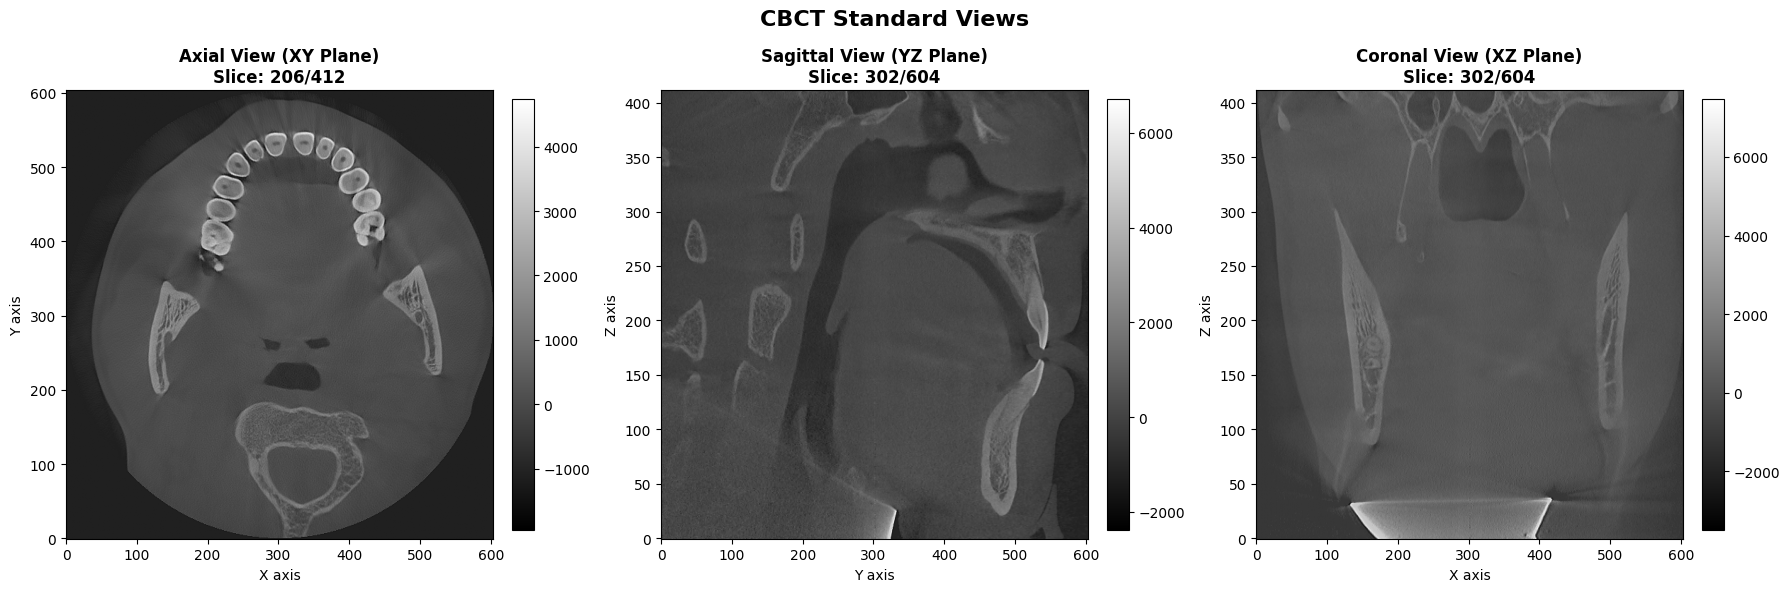


--- Visualizing Custom Slice Positions ---


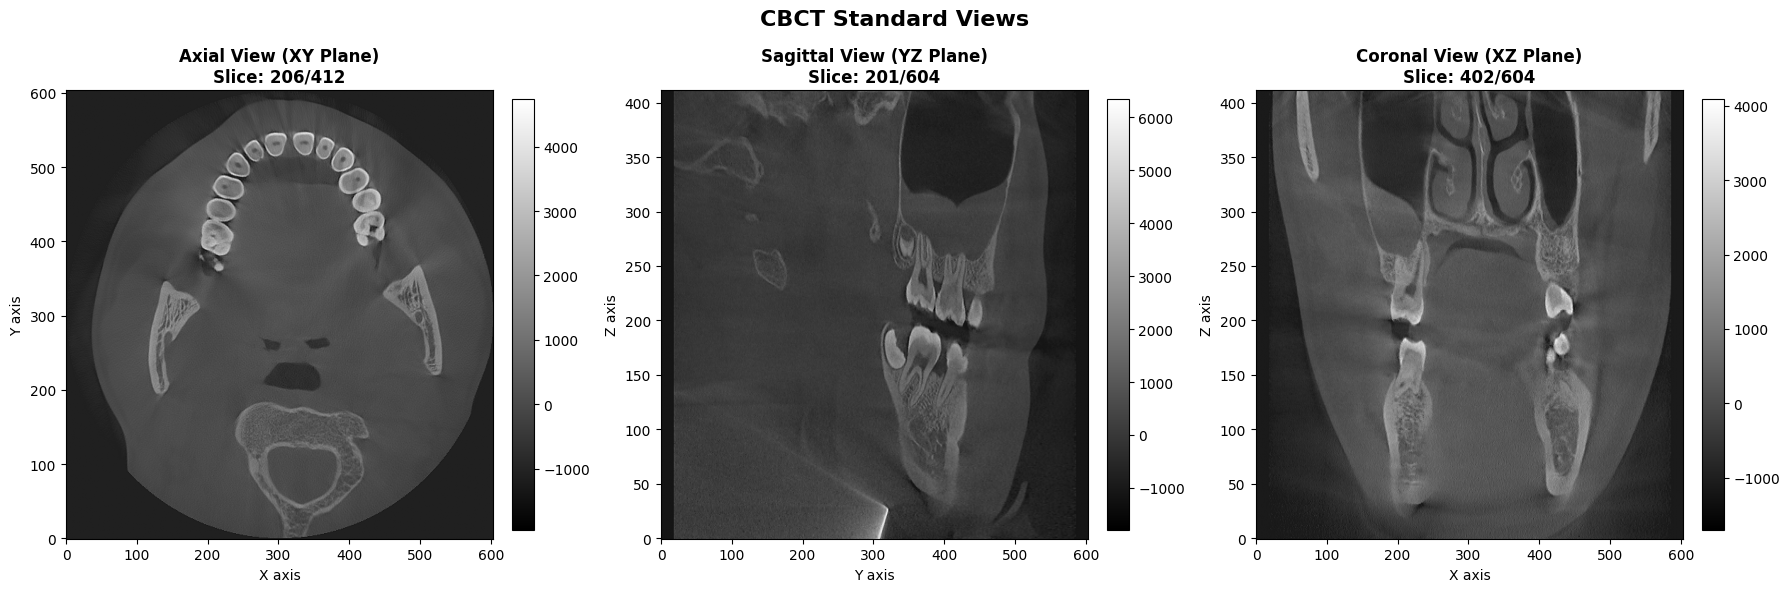


--- Visualizing Multiple Slices ---


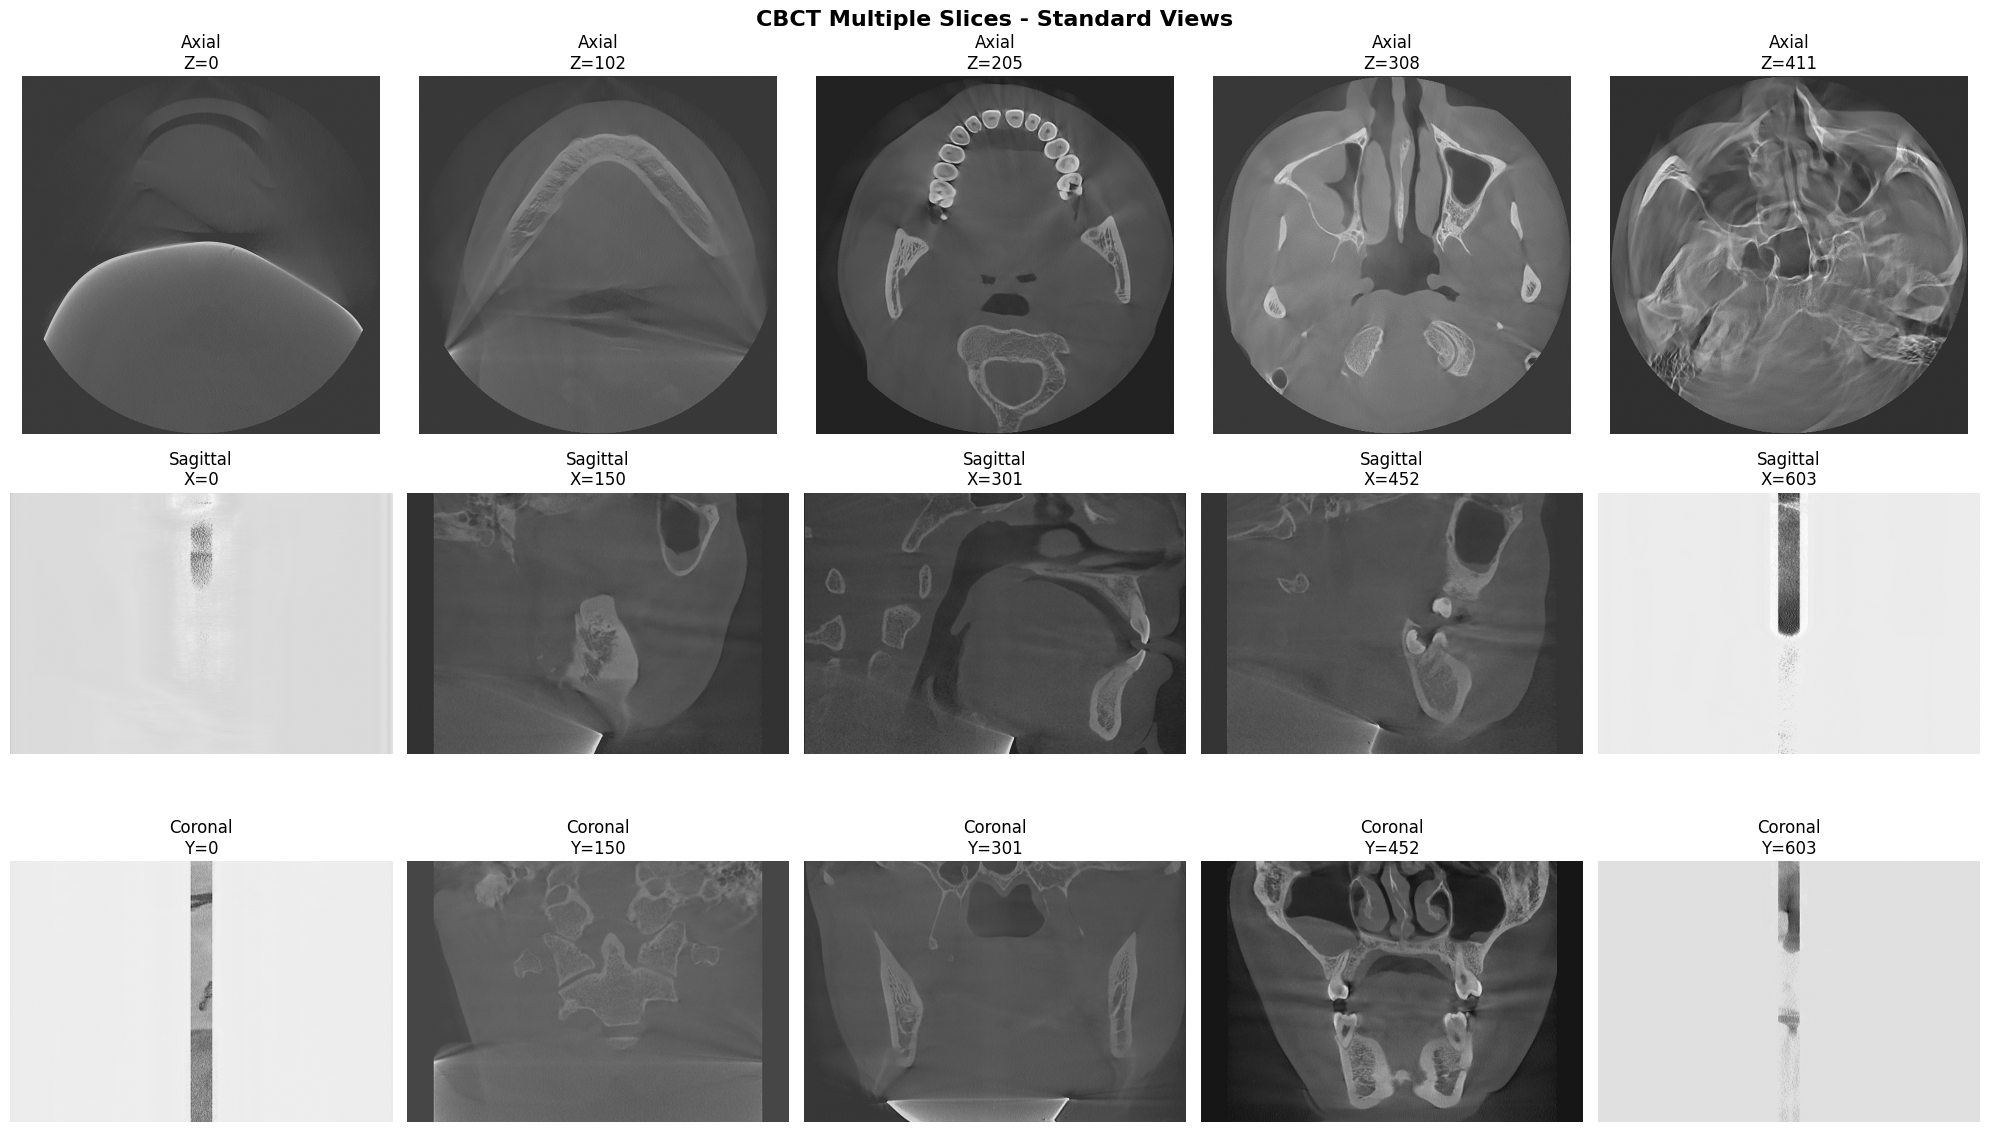


--- Saving Views Separately ---
Saved axial view to: cbct_standard_views\axial_view.png
Saved sagittal view to: cbct_standard_views\sagittal_view.png
Saved coronal view to: cbct_standard_views\coronal_view.png

--- Individual View Information ---
Axial view shape: (604, 604)
Sagittal view shape: (604, 412)
Coronal view shape: (604, 412)


In [ ]:
def load_cbct(nifti_path):
    """
    Load CBCT NIfTI file
    
    Args:
        nifti_path: Path to .nii or .nii.gz file
    
    Returns:
        volume: 3D numpy array
        affine: Affine transformation matrix
    """
    print(f"Loading CBCT from: {nifti_path}")
    nifti_img = nib.load(nifti_path)
    volume = nifti_img.get_fdata()
    affine = nifti_img.affine
    
    print(f"Volume shape: {volume.shape}")
    print(f"Value range: [{volume.min():.2f}, {volume.max():.2f}]")
    
    return volume, affine

def get_standard_views(volume, slice_indices=None):
    """
    Extract the 3 standard views from CBCT volume
    
    Args:
        volume: 3D numpy array (X, Y, Z)
        slice_indices: Dict with 'axial', 'sagittal', 'coronal' indices
                      If None, uses middle slices
    
    Returns:
        views: Dict containing the 3 standard views
    """
    if slice_indices is None:
        # Use middle slices by default
        slice_indices = {
            'axial': volume.shape[2] // 2,      # Middle Z slice
            'sagittal': volume.shape[0] // 2,   # Middle X slice
            'coronal': volume.shape[1] // 2     # Middle Y slice
        }
    
    views = {
        'axial': volume[:, :, slice_indices['axial']],           # XY plane (top view)
        'sagittal': volume[slice_indices['sagittal'], :, :],     # YZ plane (side view)
        'coronal': volume[:, slice_indices['coronal'], :]        # XZ plane (front view)
    }
    
    return views, slice_indices

def visualize_standard_views(volume, slice_indices=None, save_path=None):
    """
    Visualize all 3 standard views in one figure
    
    Args:
        volume: 3D numpy array
        slice_indices: Optional dict with slice positions
        save_path: Optional path to save the figure
    """
    views, used_indices = get_standard_views(volume, slice_indices)
    
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    fig.suptitle('CBCT Standard Views', fontsize=16, fontweight='bold')
    
    # Axial view (Top-down view)
    im1 = axes[0].imshow(views['axial'].T, cmap='gray', origin='lower', aspect='auto')
    axes[0].set_title(f"Axial View (XY Plane)\nSlice: {used_indices['axial']}/{volume.shape[2]}", 
                      fontsize=12, fontweight='bold')
    axes[0].set_xlabel('X axis')
    axes[0].set_ylabel('Y axis')
    plt.colorbar(im1, ax=axes[0], fraction=0.046, pad=0.04)
    
    # Sagittal view (Side view)
    im2 = axes[1].imshow(views['sagittal'].T, cmap='gray', origin='lower', aspect='auto')
    axes[1].set_title(f"Sagittal View (YZ Plane)\nSlice: {used_indices['sagittal']}/{volume.shape[0]}", 
                      fontsize=12, fontweight='bold')
    axes[1].set_xlabel('Y axis')
    axes[1].set_ylabel('Z axis')
    plt.colorbar(im2, ax=axes[1], fraction=0.046, pad=0.04)
    
    # Coronal view (Front view)
    im3 = axes[2].imshow(views['coronal'].T, cmap='gray', origin='lower', aspect='auto')
    axes[2].set_title(f"Coronal View (XZ Plane)\nSlice: {used_indices['coronal']}/{volume.shape[1]}", 
                      fontsize=12, fontweight='bold')
    axes[2].set_xlabel('X axis')
    axes[2].set_ylabel('Z axis')
    plt.colorbar(im3, ax=axes[2], fraction=0.046, pad=0.04)
    
    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"Figure saved to: {save_path}")
    
    plt.show()
    
    return views

def visualize_multiple_slices(volume, num_slices=5):
    """
    Visualize multiple slices from each standard view
    
    Args:
        volume: 3D numpy array
        num_slices: Number of slices to show for each view
    """
    fig, axes = plt.subplots(3, num_slices, figsize=(20, 12))
    fig.suptitle('CBCT Multiple Slices - Standard Views', fontsize=16, fontweight='bold')
    
    # Axial slices (along Z axis)
    z_indices = np.linspace(0, volume.shape[2]-1, num_slices, dtype=int)
    for i, z_idx in enumerate(z_indices):
        axes[0, i].imshow(volume[:, :, z_idx].T, cmap='gray', origin='lower')
        axes[0, i].set_title(f'Axial\nZ={z_idx}')
        axes[0, i].axis('off')
    
    # Sagittal slices (along X axis)
    x_indices = np.linspace(0, volume.shape[0]-1, num_slices, dtype=int)
    for i, x_idx in enumerate(x_indices):
        axes[1, i].imshow(volume[x_idx, :, :].T, cmap='gray', origin='lower')
        axes[1, i].set_title(f'Sagittal\nX={x_idx}')
        axes[1, i].axis('off')
    
    # Coronal slices (along Y axis)
    y_indices = np.linspace(0, volume.shape[1]-1, num_slices, dtype=int)
    for i, y_idx in enumerate(y_indices):
        axes[2, i].imshow(volume[:, y_idx, :].T, cmap='gray', origin='lower')
        axes[2, i].set_title(f'Coronal\nY={y_idx}')
        axes[2, i].axis('off')
    
    plt.tight_layout()
    plt.show()

def save_standard_views_separately(volume, output_dir='cbct_views', slice_indices=None):
    """
    Save each standard view as a separate image file
    
    Args:
        volume: 3D numpy array
        output_dir: Directory to save views
        slice_indices: Optional dict with slice positions
    """
    os.makedirs(output_dir, exist_ok=True)
    
    views, used_indices = get_standard_views(volume, slice_indices)
    
    # Save each view
    for view_name, view_data in views.items():
        plt.figure(figsize=(10, 10))
        plt.imshow(view_data.T, cmap='gray', origin='lower')
        plt.title(f'{view_name.capitalize()} View - Slice {used_indices[view_name]}', 
                  fontsize=14, fontweight='bold')
        plt.colorbar(label='Intensity')
        plt.axis('off')
        
        output_path = os.path.join(output_dir, f'{view_name}_view.png')
        plt.savefig(output_path, dpi=300, bbox_inches='tight')
        plt.close()
        print(f"Saved {view_name} view to: {output_path}")

# Main execution
# Replace with your CBCT file path
cbct_file_path = "003_cbct.nii"  # Change this to your file

# Load CBCT
volume, affine = load_cbct(cbct_file_path)

# Option 1: Visualize middle slices of all 3 views
print("\n--- Visualizing Standard Views (Middle Slices) ---")
views = visualize_standard_views(volume, save_path='cbct_standard_views.png')

# Option 2: Visualize specific slice indices
print("\n--- Visualizing Custom Slice Positions ---")
custom_indices = {
    'axial': volume.shape[2] // 2,      # Middle Z
    'sagittal': volume.shape[0] // 3,   # 1/3 from left
    'coronal': 2 * volume.shape[1] // 3 # 2/3 from front
}
views_custom = visualize_standard_views(volume, slice_indices=custom_indices)

# Option 3: Visualize multiple slices from each view
print("\n--- Visualizing Multiple Slices ---")
visualize_multiple_slices(volume, num_slices=5)

# Option 4: Save views separately
print("\n--- Saving Views Separately ---")
save_standard_views_separately(volume, output_dir='cbct_standard_views')

# Access individual views
print("\n--- Individual View Information ---")
print(f"Axial view shape: {views['axial'].shape}")
print(f"Sagittal view shape: {views['sagittal'].shape}")
print(f"Coronal view shape: {views['coronal'].shape}")